In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline 

In [17]:
col_name=['user_id','item_id','rating','time']

In [18]:
data=pd.read_csv('/home/mahima/Downloads/data.txt',sep='\t',names=col_name)

In [19]:
data

,user_id,item_id,rating,time
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [13]:
title=pd.read_csv('/home/mahima/Downloads/title.txt')

In [16]:
title

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [20]:
df=pd.merge(data,title,on='item_id')

In [21]:
#create rating dataframe 

In [22]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [23]:
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [24]:
rating_mean=pd.DataFrame(df.groupby('title')['rating'].mean())

In [26]:
rating_mean['rating_count']=pd.DataFrame(df.groupby('title')['rating'].count())

In [28]:
rating_mean

,rating,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [29]:
#draw histogram 

<AxesSubplot:>

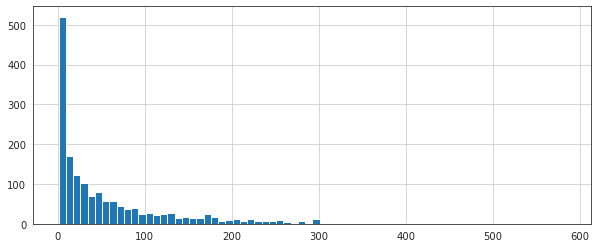

In [33]:
plt.figure(figsize=(10,4))
rating_mean['rating_count'].hist(bins=70)

<AxesSubplot:>

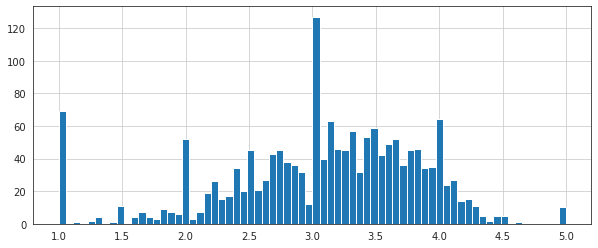

In [34]:
plt.figure(figsize=(10,4))
rating_mean['rating'].hist(bins=70)

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'rating_count'}>]], dtype=object)

<Figure size 720x288 with 0 Axes>

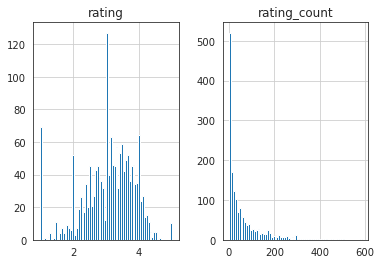

In [35]:
plt.figure(figsize=(10,4))
rating_mean.hist(bins=70)

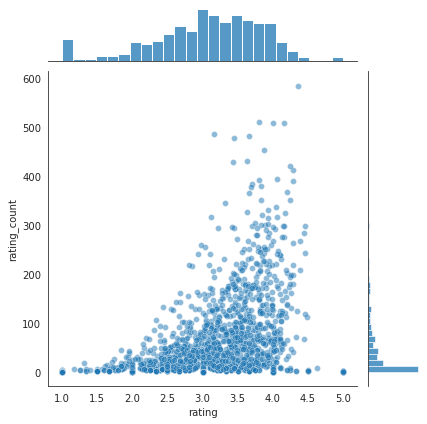

In [38]:
sns.jointplot(x='rating',y='rating_count',data=rating_mean,alpha=0.5)

In [39]:
#recommend similar movies using co relations

In [41]:
movie=df.pivot_table(index='user_id',columns='title',values='rating')

In [46]:
movie

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
rating_mean.sort_values('rating_count',ascending=False).head(10)

,rating,rating_count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [44]:
#lets take a sample movie: Fargo(1996) & 

In [47]:
fargo_rating=movie['Fargo (1996)']

In [48]:
fargo_rating

user_id
0      NaN
1      5.0
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    3.0
941    NaN
942    NaN
943    5.0
Name: Fargo (1996), Length: 944, dtype: float64

In [49]:
result=movie.corrwith(fargo_rating)

/home/mahima/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/mahima/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [50]:
fargo=pd.DataFrame(result,columns=['result'])

In [51]:
fargo

,result
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509
...,...
Young Guns II (1990),-0.018688
"Young Poisoner's Handbook, The (1995)",-0.034345
Zeus and Roxanne (1997),-0.353553


In [58]:
fargo.sort_values('result',ascending=False).head()

,result,rating_count
title,,
"Smile Like Yours, A (1997)",1.0,25
Open Season (1996),1.0,2
"Journey of August King, The (1995)",1.0,4
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0,3
"Wedding Gift, The (1994)",1.0,3


In [52]:
fargo.dropna(inplace=True)

In [54]:
fargo=fargo.join(rating_mean['rating_count'])

In [57]:
fargo[fargo['rating_count']>100].sort_values('result',ascending=False).head()

,result,rating_count
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
